# Exercises

These exercises are a bit more complex and will require you to figure things out on your own.
One thing to keep in mind: With plotting, it is good practice to always label as much as needed for anyone to understand that plot. Therefore, it is important that you do not forget to add titles, legends, axis descriptions etc to every plot you create!

In case you do not understand the exercise or need a reference on what we want you to plot, you can check out the Example_Plots_Exercises Folder. It contains examples for all of the plots you will be asked to code here.

Import numpy and matplotlib.pyplot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Create a dataset of three dimensional points (i.e. points that possess x,y and z coordinates) using numpy and plot these points in a three dimensional space using matplotlib.

Refer to https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html and https://matplotlib.org/stable/gallery/mplot3d/index.html for help.

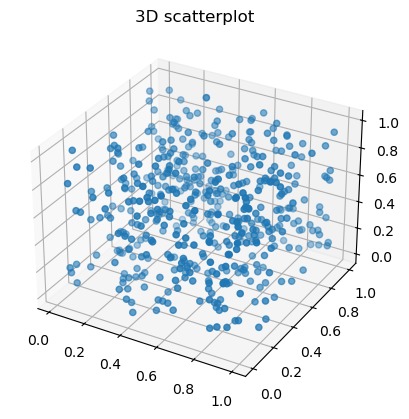

In [3]:
points = np.random.rand(3, 500)

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_title("3D scatterplot")
plt.show()

Create normally distributed values in a 50x50 grid. Display that grid as a heatmap (with a colorbar and a colormap you like).

-> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

-> https://matplotlib.org/stable/users/explain/colors/colormaps.html

Reshape the grid to a 1d array and plot the histogram. Draw a black vertical line at the mean and two orange vertical lines one standard deviation from the mean of the 1d array in the same plot as the histogram. Add a legend to the histogram plot to mark the vertical lines as the mean/standard deviations.

Combine all plots in one figure.

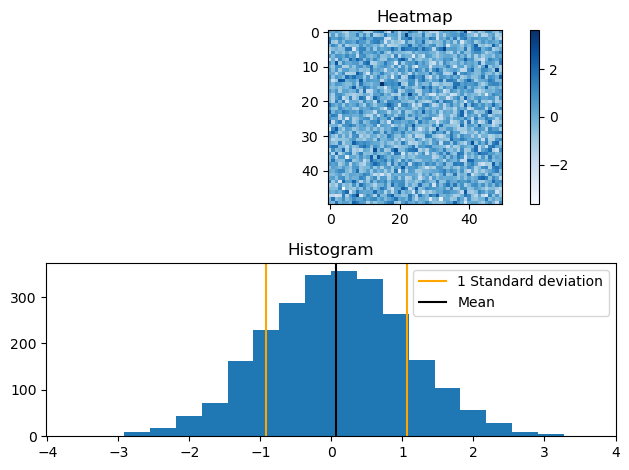

In [4]:
grid = np.random.normal(size= (50,50))
array = np.reshape(grid, 50*50)


fig, axs = plt.subplots(2)

im = axs[0].imshow(grid, cmap='Blues')
axs[0].set_title("Heatmap")
axs[1].hist(array, bins= 20)
axs[1].axvline(np.mean(array)-np.std(array), color = "orange", label = "1 Standard deviation")
axs[1].axvline(np.mean(array)+np.std(array), color = "orange")
axs[1].axvline(np.mean(array), color = "black", label = "Mean")
axs[1].set_title("Histogram")
fig.tight_layout()
plt.legend()
plt.colorbar(im)
plt.show()

Bonus exercise:

Run the following code to create some artificial sample data of neuronal spiking activity

In [5]:
ten_spike_trains = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], 
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
                   ]

With these data, there are multiple things you can do:
1) Create a raster plot of the spike trains. 
For that you can assume the "sampling rate" of the artificial data to be 1kHz -> you have data from a 20ms recording and each datapoint encompasses 1ms
Each of the rows represents one neuron.
2) Let us assume that at 4ms, the neurons were stimulated in some way for 10ms. Mark the time they were stimulated in your plot (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html might be useful here).
3) Create a histogram to indicate at what times the neurons were firing the most and plot it under the raster plot.


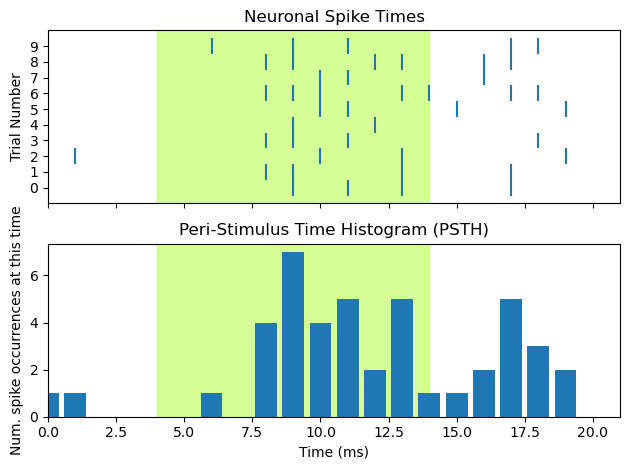

In [14]:
# credit to: https://neuraldatascience.io/6-single_unit/intro_spike_trains.html

fig, ax = plt.subplots(2, sharex = True)

spike_value = 1

# Loop to plot raster for each trial
for trial in range(len(ten_spike_trains)):
    spike_times = [i for i, x in enumerate(ten_spike_trains[trial]) if x == spike_value]
    ax[0].vlines(spike_times, trial - 0.5, trial + 0.5)

ax[0].set_xlim([0, len(ten_spike_trains[1])])

# specify tick marks and label label y axis
ax[0].set_yticks(range(len(ten_spike_trains)))
ax[0].set_ylabel('Trial Number')

ax[0].set_title('Neuronal Spike Times') 

# add shading for stimulus duration)
ax[0].axvspan(4, 14, alpha=0.5, color='greenyellow')

# add histogram
# add shading for stimulus duration)
# Do this first, so it's drawn "under" the PSTH
ax[1].axvspan(4, 14, alpha=0.5, color='greenyellow')

# Draw the PSTH
ax[1].bar(range(np.array(ten_spike_trains).shape[1]), 
        np.sum(np.array(ten_spike_trains), 0)
       )

# Make pretty
ax[1].set_title('Peri-Stimulus Time Histogram (PSTH)')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Num. spike occurrences at this time')
fig.tight_layout()

plt.show()

When you are done:

The last exercise was modified after: https://neuraldatascience.io/6-single_unit/intro_spike_trains.html. If you want, you can continue working on some of the exercises described there.